<a href="https://colab.research.google.com/github/dramfin/Spotify-Song-Popularity-Prediction-ML/blob/main/LOGIT_Label_Making_Popularity_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

url for data set : https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import CSV

df = pd.read_csv('dataset.csv')

print(df.head(10))

print(df.columns.values)

print(df.shape)

   Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                 

In [ ]:
#Missing Value Imputation

df.isnull().sum()

print(df.dropna())

DV = 'popularity'

df_sample1 = df.dropna(subset=[DV])

rvar_list = ['track_id','album_name','track_name','key','mode'] #Not needed

df_sample1 = df.drop(columns=rvar_list)

        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                    

In [ ]:
#Verify Columns
print(df_sample1.columns.values)

['Unnamed: 0' 'artists' 'popularity' 'duration_ms' 'explicit'
 'danceability' 'energy' 'loudness' 'speechiness' 'acousticness'
 'instrumentalness' 'liveness' 'valence' 'tempo' 'time_signature'
 'track_genre']


In [ ]:
#Organize Variables Into Categories

cvar_list = [
    'artists'
    ,'explicit'
    ,'track_genre']
nvar_list = [
    'duration_ms'
    ,'danceability'
    ,'energy'
    ,'loudness'
    ,'speechiness'
    ,'acousticness'
    ,'instrumentalness'
    ,'liveness'
    ,'valence'
    ,'tempo'
    ,'time_signature']

                  Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.032142    -0.032743      0.003444 -0.055994   
popularity          0.032142    1.000000    -0.007101      0.035448  0.001056   
duration_ms        -0.032743   -0.007101     1.000000     -0.073426  0.058523   
danceability        0.003444    0.035448    -0.073426      1.000000  0.134325   
energy             -0.055994    0.001056     0.058523      0.134325  1.000000   
loudness           -0.027307    0.050423    -0.003470      0.259077  0.761690   
speechiness        -0.084952   -0.044927    -0.062600      0.108626  0.142509   
acousticness        0.076840   -0.025472    -0.103788     -0.171533 -0.733906   
instrumentalness   -0.070286   -0.095139     0.124371     -0.185606 -0.181879   
liveness            0.033639   -0.005387     0.010321     -0.131617  0.184796   
valence             0.053111   -0.040534    -0.154479      0.477341  0.258934   
tempo              -0.025824

<Axes: >

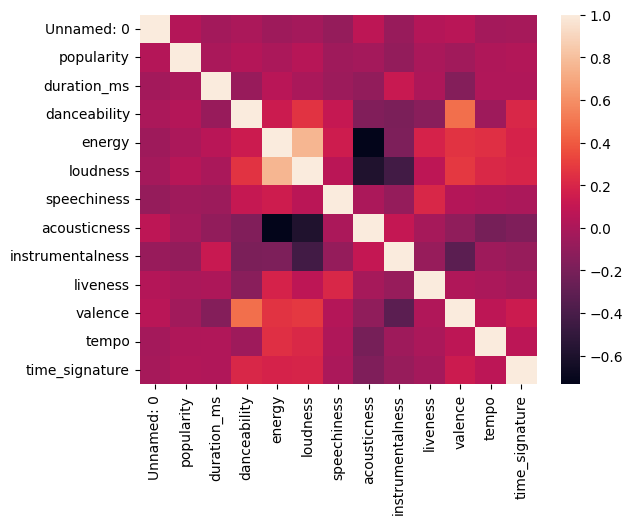

In [ ]:
#Correlation Matrix for Macro View of Data Set

dfheatmaps = df_sample1.copy()

numerical_features = dfheatmaps.select_dtypes(include=np.number).columns
corr = dfheatmaps[numerical_features].corr()

print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
#Variable Transformation
from sklearn.preprocessing import LabelEncoder

df_sample2 = df_sample1.copy()
df_sample2[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean()) / df_sample1[nvar_list].std()

df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

df_sample4 = df_sample3.copy()

percentile_90 = df_sample4['popularity'].quantile(0.90)
df_sample4['popularity_binary'] = (df_sample4['popularity'] >= percentile_90).astype(int)
drop_list = ['popularity']
df_sample4 = df_sample4.drop(columns=drop_list)

print(df_sample4.head(10))


# Label encoding for artists
artist_label_encoder = LabelEncoder()
df_sample4['artists_encoded'] = artist_label_encoder.fit_transform(df_sample4['artists'])

# Label encoding for track genre
genre_label_encoder = LabelEncoder()
df_sample4['track_genre_encoded'] = genre_label_encoder.fit_transform(df_sample4['track_genre'])

# Display encoded track genres and artists
print(df_sample4[['track_genre', 'track_genre_encoded', 'artists', 'artists_encoded']].head())



   Unnamed: 0                               artists  duration_ms explicit  \
0           0                           Gen Hoshino     0.024575    False   
1           1                          Ben Woodward    -0.730856    False   
2           2                Ingrid Michaelson;ZAYN    -0.160331    False   
3           3                          Kina Grannis    -0.243213    False   
4           4                      Chord Overstreet    -0.271918    False   
5           5                          Tyrone Wells    -0.128513    False   
6           6  A Great Big World;Christina Aguilera     0.012776    False   
7           7                            Jason Mraz     0.139023    False   
8           8             Jason Mraz;Colbie Caillat    -0.358033    False   
9           9                        Ross Copperman    -0.209093    False   

   danceability    energy  loudness  speechiness  acousticness  \
0      0.629241 -0.717145  0.300827     0.551845     -0.850198   
1     -0.845904 -1.8

In [ ]:
# Drop redundant Columns and Verify Clean Data

df_sample5 = df_sample4.copy()

df_sample5.drop(columns=['artists','track_genre','Unnamed: 0'], inplace=True)

print(df_sample5.head(10))
print(df_sample5.dtypes)
print(df_sample5.shape)

   duration_ms explicit  danceability    energy  loudness  speechiness  \
0     0.024575    False      0.629241 -0.717145  0.300827     0.551845   
1    -0.730856    False     -0.845904 -1.889971 -1.784736    -0.078993   
2    -0.160331    False     -0.742183 -1.122665 -0.293287    -0.273825   
3    -0.243213    False     -1.733297 -2.312984 -2.039243    -0.457307   
4    -0.271918    False      0.295029 -0.788707 -0.282749    -0.303144   
5    -0.128513    False      0.698389 -0.637631 -0.108969     0.192447   
6     0.012776    False     -0.920814 -1.965509 -0.111951    -0.464873   
7     0.139023    False      0.784823 -0.784731 -0.213157    -0.406234   
8    -0.358033    False      0.335365 -0.904002 -0.087693    -0.451632   
9    -0.209093    False     -0.719134 -0.037303  0.296055    -0.521620   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -0.850198         -0.504106  0.758740  0.929302 -1.141858   
1      1.831724         -0.504092 -0.591208 -0.7986

In [ ]:
#Optional Download of Database
#from google.colab import files
#df_sample5.to_csv('df_sample5.csv', encoding = 'utf-8-sig')
#files.download('df_sample5.csv')

In [ ]:
from sklearn.model_selection import train_test_split

df4partition = df_sample5
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

        duration_ms explicit  danceability    energy  loudness  speechiness  \
104483     0.066831    False     -0.868953 -1.126640 -0.054886    -0.363674   
17411     -0.382377    False      0.646528  1.234916  1.089997    -0.236939   
73414      0.902236    False      1.136323 -1.456622 -0.703083    -0.427987   
95288      0.452049    False      1.130561  0.666393  0.656540    -0.367457   
77403     -0.122921    False     -0.125618  0.169433  0.074753    -0.370294   
...             ...      ...           ...       ...       ...          ...   
50057      0.553943    False     -0.949625  0.022332  0.202007    -0.497975   
98047     -0.622969    False     -1.110970 -2.311394 -2.055746    -0.154656   
5192      -1.400544    False     -0.523216 -2.235061 -4.009682    -0.513108   
77708     -0.287827    False      0.456373  0.765785 -0.165636    -0.392048   
98539     -0.797306    False     -2.200042 -2.289925 -2.267901    -0.448795   

        acousticness  instrumentalness  liveness   

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

DV = 'popularity_binary'
y = df_nontestData[DV].astype('int')
X = df_nontestData.drop(columns=[DV])

alpha = 10

clf = LogisticRegression(C=1/alpha, penalty='l1', solver='liblinear', max_iter=5000, random_state=1).fit(X, y)

def summary_coef(model_object):
    n_predictors = X.shape[1]
    model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
    model_coef['Intercept'] = model_object.intercept_
    return model_coef.transpose()

print(summary_coef(clf))

                            0
duration_ms         -0.087196
explicit             0.479230
danceability         0.126665
energy              -0.276481
loudness             0.226655
speechiness         -0.180144
acousticness        -0.281121
instrumentalness    -0.474340
liveness            -0.230887
valence             -0.082740
tempo               -0.066622
time_signature       0.043874
artists_encoded     -0.000003
track_genre_encoded  0.000203
Intercept           -2.374505


In [ ]:
# Count NaN values per column
nan_count_per_column = df_nontestData.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = df_nontestData.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)
print(f"\nTotal NaN values in the DataFrame: {total_nan_count}")


NaN count per column:
duration_ms            0
explicit               0
danceability           0
energy                 0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
popularity_binary      0
artists_encoded        0
track_genre_encoded    0
dtype: int64

Total NaN values in the DataFrame: 0


In [ ]:
#Backtesting Model

from sklearn.metrics import roc_auc_score, accuracy_score, mean_absolute_error

# Predict on the test data
y_pred_proba = clf.predict_proba(df_testData.drop(columns=[DV]))[:, 1]
y_pred = clf.predict(df_testData.drop(columns=[DV]))
y_true = df_testData[DV]

# Calculate AUC
auc = roc_auc_score(y_true, y_pred_proba)
print(f"AUC: {auc}")

# Calculate ASE (Average Squared Error)
ase = mean_absolute_error(y_true, y_pred)
print(f"ASE: {ase}")

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

AUC: 0.6700680130879643
ASE: 0.10100877192982456
Accuracy: 0.8989912280701754


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error

# Define the function to perform k-fold cross-validation and evaluate metrics
def evaluate_model_with_kfolds(df_testData, k_folds=5, min_alpha=0.001, max_alpha=1000):
    # Splitting data into features (X) and target (y)
    X = df_testData.drop(columns=["popularity_binary"])  # Replace "target" with your target column name
    y = df_testData["popularity_binary"]  # Replace "target" with your target column name

    # Define range of alphas
    alphas = np.logspace(np.log10(min_alpha), np.log10(max_alpha), num=50)
    results = []

    # Perform k-fold cross-validation
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    for alpha in alphas:
        auc_scores = []
        ase_scores = []
        accuracies = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Initialize the Ridge Classifier with the current alpha
            model = RidgeClassifier(alpha=alpha)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_prob = model.decision_function(X_test)

            # Compute metrics
            auc = roc_auc_score(y_test, y_pred_prob)
            ase = mean_squared_error(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)

            # Append scores for this fold
            auc_scores.append(auc)
            ase_scores.append(ase)
            accuracies.append(accuracy)

        # Average metrics over k-folds
        results.append({
            "alpha": alpha,
            "AUC": np.mean(auc_scores),
            "ASE": np.mean(ase_scores),
            "Accuracy": np.mean(accuracies)
        })

    # Convert results to a DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

results_df = evaluate_model_with_kfolds(df_testData=df_testData)

# Find the best alpha based on the highest AUC
best_result = results_df.loc[results_df["AUC"].idxmax()]
best_alpha = best_result["alpha"]

# Print the best alpha and its associated metrics
print(f"Best Alpha: {best_alpha}")
print(f"Metrics at Best Alpha:")
print(f"AUC: {best_result['AUC']}")
print(f"ASE: {best_result['ASE']}")
print(f"Accuracy: {best_result['Accuracy']}")



Best Alpha: 568.9866029018293
Metrics at Best Alpha:
AUC: 0.6672889275663261
ASE: 0.10100877192982456
Accuracy: 0.8989912280701754
